In [27]:
from dpks.quant_matrix import QuantMatrix
from sklearn.cluster import KMeans, AgglomerativeClustering, FeatureAgglomeration, HDBSCAN

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import make_classification

In [28]:

# Parameters for the dataset
n_samples = 1000
n_features = 6000
n_informative = 100
n_redundant = 0
n_repeated = 0
n_noise = n_features - n_informative - n_redundant

# Create a dataset with informative, redundant, and noise features
X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_redundant=n_redundant,
    n_repeated=n_repeated,
    n_classes=2,
    random_state=42,
    n_clusters_per_class=2,
    shuffle=False,
    shift=25,
    scale=1
)


In [29]:
(X < 0).sum()

0

In [30]:
# X_log2 = np.log2(X + 1)
# noise = np.random.normal(0, 0.1, X_log2.shape)
# X_log2_hetero = X_log2 + noise

In [31]:
protein_ids = [f'Protein_{i+1}' for i in range(n_features)]

In [32]:

X = pd.DataFrame(X, columns=protein_ids)

X

,Protein_1,Protein_2,Protein_3,Protein_4,Protein_5,Protein_6,Protein_7,Protein_8,Protein_9,Protein_10,...,Protein_5991,Protein_5992,Protein_5993,Protein_5994,Protein_5995,Protein_5996,Protein_5997,Protein_5998,Protein_5999,Protein_6000
0,21.564307,33.166160,25.650801,33.180446,28.392508,24.733976,33.477774,31.085660,20.656709,29.553184,...,24.813331,24.431993,24.091240,24.429352,24.564197,26.394635,23.951715,24.474190,25.314138,25.842952
1,20.101983,23.991026,12.699208,18.353943,27.254581,21.014142,24.874518,26.490866,28.737731,40.668323,...,23.775365,24.383193,26.893995,25.160635,24.894622,25.341358,24.206898,23.477081,24.863820,25.448028
2,29.772507,24.889565,17.367669,29.886376,30.541666,33.679653,21.435994,25.021013,16.772088,29.098106,...,25.003649,24.135497,25.082172,25.750346,24.706813,23.669561,24.385352,25.128114,24.036504,25.787845
3,29.362562,18.129390,16.527802,18.590741,23.807995,34.943076,18.883772,18.910565,18.699290,12.443864,...,26.025803,27.294366,24.397039,24.347715,26.788573,24.464797,23.646085,26.485025,25.747110,26.504920
4,22.677654,25.089983,28.222872,29.302158,28.920763,22.649509,26.579445,13.815794,23.828193,23.096441,...,23.750552,23.841183,25.281918,25.551361,26.750604,24.376677,25.622269,25.444674,24.999882,23.859282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,25.255356,24.989891,22.743561,12.252413,32.641946,15.119072,17.700483,29.562724,17.159962,29.236688,...,23.835662,24.845693,27.264317,26.824942,24.280560,23.525565,27.042440,25.134504,25.204991,25.175967
996,20.539902,25.589179,18.653880,20.763617,20.001544,19.268570,32.822987,23.746836,25.714892,21.406553,...,23.648866,24.450013,24.349900,26.090247,25.174308,27.044572,26.552719,24.361420,24.362286,25.993524
997,14.991714,19.848960,30.891902,25.448906,28.422100,15.345494,35.585313,28.167172,29.484175,19.883902,...,24.777998,24.880491,24.078967,25.997987,24.002489,24.783820,24.713475,23.054986,26.317363,24.854772
998,29.150907,26.174436,25.330895,26.041951,18.258802,22.083512,16.918916,20.923400,27.268864,28.235925,...,24.550902,26.522489,25.207114,23.337055,25.321576,23.347706,24.552235,25.915813,25.386027,27.141492


In [33]:
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
#
# X[:] = scaler.fit_transform(X[:])

In [34]:
from umap import UMAP

pca = UMAP(n_components=2, n_neighbors=5)

pca.fit(X)

components = pca.transform(X)

In [35]:
components = np.concatenate((y.reshape((-1, 1)), components), axis=1)

<Axes: xlabel='PC1', ylabel='PC2'>

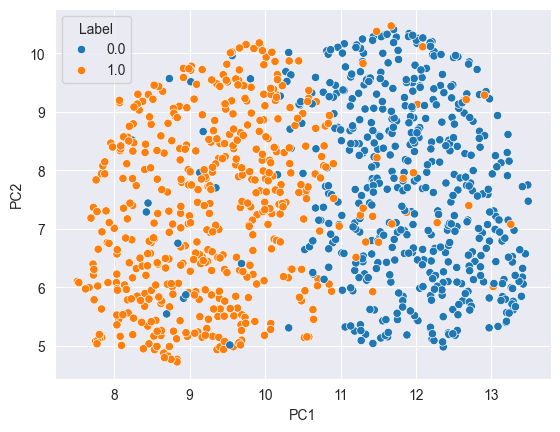

In [36]:
components = pd.DataFrame(components, columns=['Label', 'PC1', 'PC2'])

sns.scatterplot(
    data=components,
    x='PC1',
    y='PC2',
    hue='Label',
)

In [37]:
X

,Protein_1,Protein_2,Protein_3,Protein_4,Protein_5,Protein_6,Protein_7,Protein_8,Protein_9,Protein_10,...,Protein_5991,Protein_5992,Protein_5993,Protein_5994,Protein_5995,Protein_5996,Protein_5997,Protein_5998,Protein_5999,Protein_6000
0,21.564307,33.166160,25.650801,33.180446,28.392508,24.733976,33.477774,31.085660,20.656709,29.553184,...,24.813331,24.431993,24.091240,24.429352,24.564197,26.394635,23.951715,24.474190,25.314138,25.842952
1,20.101983,23.991026,12.699208,18.353943,27.254581,21.014142,24.874518,26.490866,28.737731,40.668323,...,23.775365,24.383193,26.893995,25.160635,24.894622,25.341358,24.206898,23.477081,24.863820,25.448028
2,29.772507,24.889565,17.367669,29.886376,30.541666,33.679653,21.435994,25.021013,16.772088,29.098106,...,25.003649,24.135497,25.082172,25.750346,24.706813,23.669561,24.385352,25.128114,24.036504,25.787845
3,29.362562,18.129390,16.527802,18.590741,23.807995,34.943076,18.883772,18.910565,18.699290,12.443864,...,26.025803,27.294366,24.397039,24.347715,26.788573,24.464797,23.646085,26.485025,25.747110,26.504920
4,22.677654,25.089983,28.222872,29.302158,28.920763,22.649509,26.579445,13.815794,23.828193,23.096441,...,23.750552,23.841183,25.281918,25.551361,26.750604,24.376677,25.622269,25.444674,24.999882,23.859282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,25.255356,24.989891,22.743561,12.252413,32.641946,15.119072,17.700483,29.562724,17.159962,29.236688,...,23.835662,24.845693,27.264317,26.824942,24.280560,23.525565,27.042440,25.134504,25.204991,25.175967
996,20.539902,25.589179,18.653880,20.763617,20.001544,19.268570,32.822987,23.746836,25.714892,21.406553,...,23.648866,24.450013,24.349900,26.090247,25.174308,27.044572,26.552719,24.361420,24.362286,25.993524
997,14.991714,19.848960,30.891902,25.448906,28.422100,15.345494,35.585313,28.167172,29.484175,19.883902,...,24.777998,24.880491,24.078967,25.997987,24.002489,24.783820,24.713475,23.054986,26.317363,24.854772
998,29.150907,26.174436,25.330895,26.041951,18.258802,22.083512,16.918916,20.923400,27.268864,28.235925,...,24.550902,26.522489,25.207114,23.337055,25.321576,23.347706,24.552235,25.915813,25.386027,27.141492


In [38]:
samples = [f'Sample_{i+1}' for i in range(n_samples)]
df = pd.DataFrame(X, index=protein_ids, columns=samples)
df = df.reset_index(names="Protein")

In [39]:
group_labels = y

In [40]:
design_matrix = pd.DataFrame(
    {
        "sample": samples,
        "group": group_labels,
    }
)

In [41]:
design_matrix.to_csv(
    "../tests/input_files/simulated_design_matrix.tsv",
    sep="\t",
    index=False,
)

In [42]:
df.to_csv(
    "../tests/input_files/simulated_proteins.tsv",
    sep="\t",
    index=False,
)

In [43]:
from dpks.quant_matrix import QuantMatrix

quant_matrix = QuantMatrix(
    quantification_file=df,
    design_matrix_file=design_matrix,
)

In [44]:
quant_matrix = quant_matrix.compare(
    method="anova",
    comparisons=(1, 0),
    min_samples_per_group=2,
    level="protein",
    multiple_testing_correction_method="fdr_tsbh",
)

/Users/aaron/Documents/projects/dpks/DPKS/dpks/differential_testing.py:205: RuntimeWarning: All-NaN axis encountered
  max_log_p_value = np.nanmax(log_p_values)
/Users/aaron/Documents/projects/dpks/DPKS/dpks/differential_testing.py:206: RuntimeWarning: All-NaN axis encountered
  max_log_fold_change = np.nanmax([abs(fc) for fc in log_fold_changes])


ZeroDivisionError: float division by zero

In [48]:
da_df = quant_matrix.row_annotations

In [49]:
da_df[da_df['CorrectedPValueGroup2-Group1'] <= 0.01]

,Protein,DEScoreGroup2-Group1,GroupGroup2Mean,GroupGroup1Mean,GroupGroup2Stdev,GroupGroup1Stdev,Log2FoldChangeGroup2-Group1,PValueGroup2-Group1,GroupGroup2RepCounts,GroupGroup1RepCounts,CorrectedPValueGroup2-Group1,-Log10CorrectedPValueGroup2-Group1
0,Protein_1,0.356691,19.520082,18.991030,0.176330,0.174425,0.529053,5.880715e-14,25,25,1.109455e-13,12.954890
1,Protein_2,0.901199,11.602853,9.970697,0.190281,0.203174,1.632156,6.839904e-32,25,25,2.910936e-31,30.535967
2,Protein_3,0.781375,12.714662,10.914085,0.258220,0.396921,1.800578,1.308990e-23,25,25,3.373877e-23,22.471871
3,Protein_4,0.472997,13.016701,12.099621,0.254637,0.259321,0.917081,1.578994e-16,25,25,3.041642e-16,15.516892
4,Protein_5,1.157981,14.263268,12.000958,0.185515,0.192470,2.262310,3.030621e-39,25,25,5.546037e-38,37.256017
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Protein_96,1.134746,12.834561,10.100008,0.339999,0.304674,2.734553,2.593715e-32,25,25,1.249079e-31,30.903410
96,Protein_97,0.992742,16.488963,14.010834,0.319091,0.437830,2.478129,4.532682e-27,25,25,1.430139e-26,25.844622
97,Protein_98,0.830974,10.285035,8.040301,0.472748,0.557593,2.244734,8.542397e-20,25,25,1.736954e-19,18.760212
98,Protein_99,0.868213,19.178636,17.010256,0.414568,0.385286,2.168380,9.510993e-24,25,25,2.486445e-23,22.604421


In [50]:
da_df[da_df['Protein'] == "Protein_101"]

,Protein,DEScoreGroup2-Group1,GroupGroup2Mean,GroupGroup1Mean,GroupGroup2Stdev,GroupGroup1Stdev,Log2FoldChangeGroup2-Group1,PValueGroup2-Group1,GroupGroup2RepCounts,GroupGroup1RepCounts,CorrectedPValueGroup2-Group1,-Log10CorrectedPValueGroup2-Group1
100,Protein_101,0.053022,11.792567,11.949031,0.351,0.342039,-0.156464,0.124384,25,25,0.127878,0.893206


In [51]:
da_df.sort_values(by="CorrectedPValueGroup2-Group1", ascending=True)

,Protein,DEScoreGroup2-Group1,GroupGroup2Mean,GroupGroup1Mean,GroupGroup2Stdev,GroupGroup1Stdev,Log2FoldChangeGroup2-Group1,PValueGroup2-Group1,GroupGroup2RepCounts,GroupGroup1RepCounts,CorrectedPValueGroup2-Group1,-Log10CorrectedPValueGroup2-Group1
88,Protein_89,1.414214,18.241920,15.008110,0.262386,0.193775,3.233810,1.810650e-42,25,25,3.313489e-40,39.479714
89,Protein_90,1.141004,11.947212,10.026888,0.156693,0.130855,1.920325,2.141034e-41,25,25,1.574181e-39,38.802945
58,Protein_59,1.173700,18.149302,16.013443,0.174998,0.147642,2.135858,3.166764e-41,25,25,1.574181e-39,38.802945
60,Protein_61,1.195068,16.302047,14.041798,0.184492,0.157724,2.260248,3.440833e-41,25,25,1.574181e-39,38.802945
26,Protein_27,1.124510,11.903229,9.982255,0.143418,0.156851,1.920974,1.394339e-40,25,25,4.584937e-39,38.338667
...,...,...,...,...,...,...,...,...,...,...,...,...
220,Protein_221,0.000789,8.053292,8.050958,0.224565,0.199535,0.002335,9.697872e-01,25,25,5.981364e-01,0.223200
218,Protein_219,0.001142,14.922327,14.918840,0.247853,0.292129,0.003487,9.646186e-01,25,25,5.981364e-01,0.223200
296,Protein_297,0.000386,12.009070,12.008078,0.122530,0.121643,0.000992,9.776687e-01,25,25,6.003804e-01,0.221573
192,Protein_193,0.000361,17.031444,17.032575,0.319312,0.392049,-0.001131,9.913018e-01,25,25,6.046941e-01,0.218464


In [52]:
da_df['ProteinNum'] = da_df['Protein'].str.split("_").str[-1].astype(int)

In [53]:
da_df['DAType'] = np.where(da_df['ProteinNum'] <= 100, 1, np.where(da_df['ProteinNum'] < 200, 2, 0))

<Axes: xlabel='Log2FoldChangeGroup2-Group1', ylabel='-Log10CorrectedPValueGroup2-Group1'>

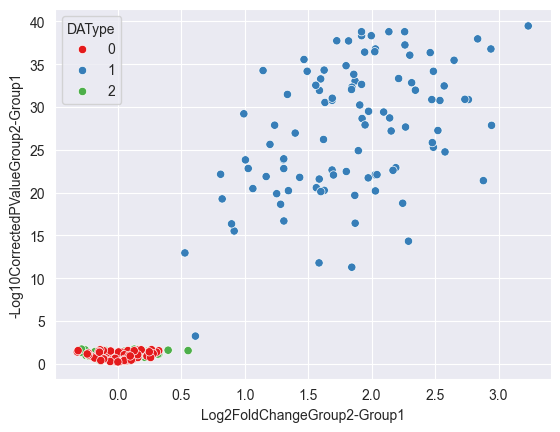

In [54]:
sns.scatterplot(
    data=da_df,
    x="Log2FoldChangeGroup2-Group1",
    y="-Log10CorrectedPValueGroup2-Group1",
    hue="DAType",
    palette="Set1",
)

In [27]:
da_df

,Protein,DEScoreGroup2-Group1,GroupGroup2Mean,GroupGroup1Mean,GroupGroup2Stdev,GroupGroup1Stdev,Log2FoldChangeGroup2-Group1,PValueGroup2-Group1,GroupGroup2RepCounts,GroupGroup1RepCounts,CorrectedPValueGroup2-Group1,-Log10CorrectedPValueGroup2-Group1,ProteinNum,DAType
0,Protein_1,0.611962,10.325277,10.005668,0.513933,0.537900,0.319609,6.384266e-21,500,500,4.757379e-19,18.322632,1,1
1,Protein_2,0.098939,17.063754,17.023624,0.180206,0.167111,0.040131,2.784064e-04,500,500,1.392032e-02,1.856351,2,1
2,Protein_3,0.996976,9.361219,9.041304,0.370667,0.379646,0.319915,4.097088e-38,500,500,1.544287e-35,34.811272,3,1
3,Protein_4,1.154303,10.576409,10.036481,0.613543,0.609071,0.539928,1.523415e-40,500,500,3.732366e-37,36.428016,4,1
4,Protein_5,0.483148,12.037911,12.000647,0.063359,0.062550,0.037264,5.610459e-20,500,500,3.984239e-18,17.399655,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Protein_4996,0.006940,19.007756,19.002782,0.182253,0.183738,0.004974,6.677570e-01,500,500,7.901496e-01,0.102291,4996,0
4996,Protein_4997,0.007280,9.007188,9.002031,0.181856,0.176919,0.005157,6.498759e-01,500,500,7.766810e-01,0.109757,4997,0
4997,Protein_4998,0.040362,12.077672,12.043749,0.429630,0.428220,0.033922,2.118773e-01,500,500,4.024026e-01,0.395339,4998,0
4998,Protein_4999,0.054933,15.962653,15.996203,0.231676,0.231787,-0.033550,2.241142e-02,500,500,1.646317e-01,0.783487,4999,0


In [28]:
quant_matrix.quantitative_data.X

array([[10.14258148,  9.91448125, 11.08235873, ...,  9.91630875,
         9.65543791, 10.55578213],
       [16.8514186 , 17.07972941, 17.00737852, ..., 17.31159483,
        16.93258008, 16.89292357],
       [ 8.74827668,  9.32851764,  9.14832183, ...,  9.06408633,
         8.77289403,  9.95907766],
       ...,
       [12.35418135, 11.68026659, 12.03466644, ..., 12.32600914,
        12.44196912, 11.51297096],
       [16.18859594, 15.94877871, 15.62885679, ..., 15.56679893,
        15.92952884, 16.30447773],
       [ 8.90036931,  9.04326378,  9.22281911, ...,  8.66543625,
         9.40623195,  8.95010901]])

<Axes: xlabel='Log2FoldChangeGroup2-Group1', ylabel='Count'>

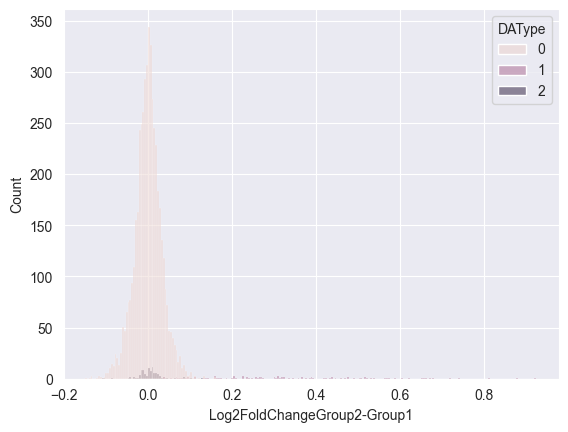

In [36]:
sns.histplot(
    data=da_df,
    x="Log2FoldChangeGroup2-Group1",
    hue="DAType",
)